### Importing Required Libraries:

In [8]:
# Importing required Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['patch.force_edgecolor'] = True

import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS

from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading Data:

In [2]:
data = pd.read_csv('D:/CRITICAL/New_Desktop/fake-news/fake.csv', encoding='utf8', index_col=0)
data.head(3)

,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
uuid,,,,,,,,,,,,,,,,,,,
6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


Data shape is (12999, 19)


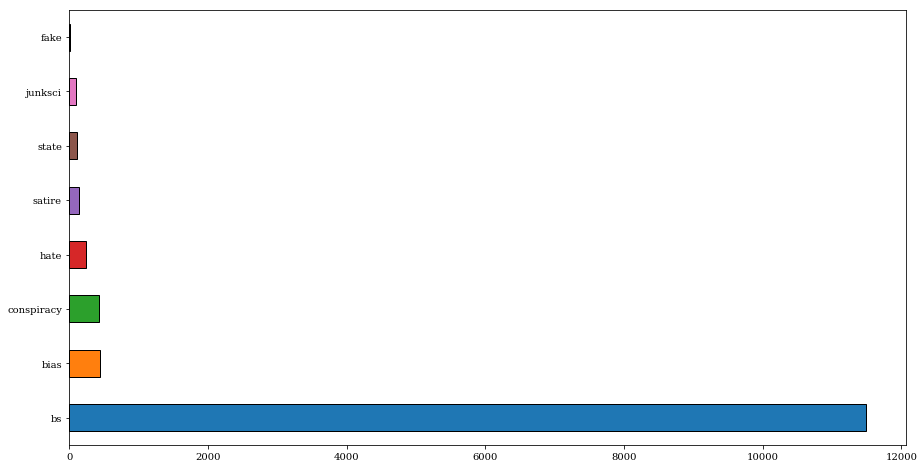

In [9]:
print(f'Data shape is {data.shape}')
data.type.value_counts().plot(kind='barh')

### Preprocessing Data:

In [4]:
fake_news = data[data['type'] == 'fake']

# Filling blank fields:
fake_news.fillna('', inplace=True)

# Joining 'title' and 'text':
doc = fake_news.title.str.cat(fake_news.text, sep=' ')

# Tokenize:
words = nltk.word_tokenize(' '.join(doc.tolist()))

# Treating Stopwords:
stop = stopwords.words('english')
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

### Word Tags:

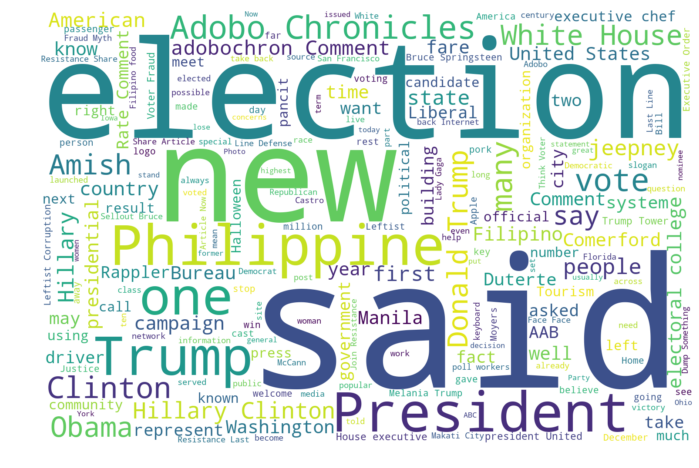

In [10]:
wc = WordCloud(stopwords=STOPWORDS,background_color='white',width=1500,height=1000).generate(' '.join(cleanwords))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### [Bigram](https://en.wikipedia.org/wiki/Bigram) Lookout:

[(('The', 'Adobo'), 20), (('Adobo', 'Chronicles'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 13), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6)]


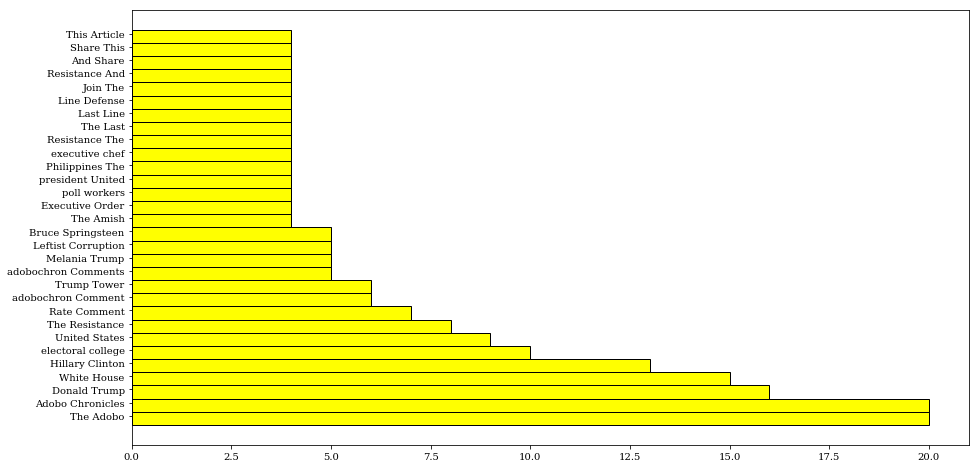

In [11]:
# Common bigrams:
bigrams = nltk.bigrams(cleanwords)
counter = Counter(bigrams)
print(counter.most_common(10))

# To visualize:
num = 30
labels = [' '.join(e[0]) for e in counter.most_common(num)]
values = [i[1] for i in counter.most_common(num)]
indices = np.arange(len(labels))
width = 1

plt.barh(indices, values, width, color='yellow')
plt.yticks(indices + width * 0.2, labels)
plt.show()